<a href="https://colab.research.google.com/github/Javcm/Temas-selectos-de-Ciencia-de-Datos-Ayudantias-CIMAT/blob/main/Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Callbacks

* **Model checkpointing** : Guarda los pesos actuales del modelo en diferentes puntos del entrenamiento


* **Early stopping**: Interrumpe el entrenamiento cuando el error de validación no mejora (guarda el mejor modelo obtenido en el entrenamiento)


* **Dynamically adjusting the value of certain parameters during training**: Tal como el learning rate del optimizador 


* **Logging training and validation metrics during training, or visualizing the representations
learned by the model as they’re updated** : La barra del progreso de Keras


In [ ]:
import keras
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

keras.callbacks.CSVLogger

In [ ]:
import keras
from keras import layers
from keras.preprocessing import sequence
import numpy as np
from keras.datasets import mnist

max_features = 2000
max_len = 500

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,input_length=max_len,name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

TypeError: ignored

**THE MODELCHECKPOINT AND EARLYSTOPPING CALLBACKS**

* **EarlyStopping callback:** interrumpe el entrenamiento una vez que la metrica a monitorear deja de mejorar para un número fijo de epocas. Permite detener el entrenamiento antes de presentar problemas de overfitting


* **ModelCechpoint**: permite guardr continuamente el modelo durante el entrenamiento (sólo guarda el mejor modelo: el modelo que registra la mejor actuación al final de cada epoca)

In [ ]:
import keras

#Los Callbacks se pasan como argumento en forma de lista en el entrenamiento (en el .fit)

callbacks_list = [keras.callbacks.EarlyStopping( monitor='acc', patience=1,), # Interrumpe entrenamiento cuando no hay mejora
                  
                  # monitor -> Parámetro a monitorear en la validación del modelo.
                  # patience -> Número a partir del cuál se interrumpe el entrenamiento cuando la métrica no mejora.
                  
                  keras.callbacks.ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_best_only=True,)] # Saves the current weights after every epoch
                # filepath -> Dirección a guardar del modelo
                # monitor & save_best_only ->  Se guarda el modelo sólo si el error de validación mejora.        
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Note that because the callback will monitor validation loss and validation accuracy, you need to pass validation_data to the call to fit.
model.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=callbacks_list, validation_data=(x_val, y_val))

NameError: ignored

**THE REDUCELRONPLATEAU CALLBACK**

* Reduce el learnig rate cuando el error de validación no mejora. Es una estrategia efectiva para salir de mínimos locales durante el entrenamiento

In [ ]:
callbacks_list = [
keras.callbacks.ReduceLROnPlateau(
monitor='val_loss' # Monitorea el error de validación del modelo
factor=0.1, # Divide la tasa de aprendizaje por 10 cuando se activa
patience=10, # El callback se activa a partir de que el error de validación deja de 
            # mejorar durante 10 epocas
)
]


model.fit(x_train, y_train,
epochs=10,
batch_size=32,
callbacks=callbacks_list,
validation_data=(x_val, y_val))

SyntaxError: ignored

Ejemplo: Guardar las capaz de activación del modelo al final de cada epoca, esto solo para el primer sample del conjunto de validación

In [ ]:
import keras
import numpy as np

class ActivationLogger(keras.callbacks.Callback):
    # Called by the parent model before training, to inform the callback of what model will be calling it
    def set_model(self, model):
        self.model = model
        layer_outputs = [layer.output for layer in model.layers]
        self.activations_model = keras.models.Model(model.input,layer_outputs)
    # Model instance that returns the activations of every layer    
    def on_epoch_end(self, epoch, logs=None):
        if self.validation_data is None:
            raise RuntimeError('Requires validation_data.')
            
    validation_sample = self.validation_data[0][0:1] # Obtains the first input sample of the validation data
    activations = self.activations_model.predict(validation_sample)
    f = open('activations_at_epoch_' + str(epoch) + '.npz', 'w') # Saves arrays to disk
    np.savez(f, activations)
    f.close()

Ejemplo: Clasificación de Texto con TensorBoard

Datos -> IMDB data análisis de sentimientos

In [ ]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence
import numpy as np

max_features = 2000
max_len = 500

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# Loads the data as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# importando los datos como una secuencia de números, índices


# restore np.load for future normal usage
np.load = np_load_old

x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
input_length=max_len,
name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

TypeError: ignored

### 1.4 Callbacks Early stopping

In [ ]:
from keras.layers import Dropout

entrada = Input(shape = (28*28,))
x = Dense(16,  activation = "relu")(entrada)
x = Dense(16,  activation = "relu")(x)
salida = Dense(10, activation ="softmax")(x)

modelo = Model(entrada, salida)

modelo.summary()


NameError: ignored

In [ ]:
import time
import keras

callbacks_list = [ keras.callbacks.EarlyStopping( monitor='acc', patience=1,),                 
                  keras.callbacks.ModelCheckpoint(filepath='my_model.h5', monitor='val_loss', save_best_only=True,)] 

modelo.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


tic=time.time()

historia = modelo.fit(train_images, train_labels, epochs=75, batch_size=128, callbacks=callbacks_list, validation_split=0.2 )

print('Tiempo de procesamiento (secs): ', time.time()-tic)

NameError: ignored

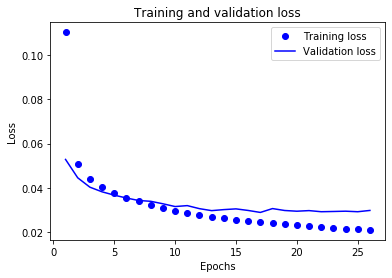

In [ ]:
acc = historia.history['acc']
val_acc = historia.history['val_acc']
loss = historia.history['loss']
val_loss = historia.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 35us/step
test_acc: 0.990899998664856


* Se observa el número de epoca en el cual se detiene el entrenamiento

In [ ]:
epoca = len(historia.epoch) # epoca seleccionada
print(epoca)

26


* Eliminamos el modelo y entrenamos con el número de epoca obtenida 

In [ ]:
del modelo

In [ ]:
from keras.layers import Dropout

entrada = Input(shape = (28*28,))
x = Dense(16,  activation = "relu")(entrada)
x = Dense(16,  activation = "relu")(x)
salida = Dense(10, activation ="softmax")(x)

modelo = Model(entrada, salida)

modelo.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_37 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time

modelo.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


tic=time.time()

historia = modelo.fit(train_images, train_labels, epochs= epoca, batch_size=128, validation_split=0.2 )

print('Tiempo de procesamiento (secs): ', time.time()-tic)

Train on 48000 samples, validate on 12000 samples
Epoch 1/26
48000/48000 [==============================] - 2s 41us/step - loss: 0.1163 - acc: 0.9593 - val_loss: 0.0576 - val_acc: 0.9816
Epoch 2/26
48000/48000 [==============================] - 1s 26us/step - loss: 0.0531 - acc: 0.9828 - val_loss: 0.0445 - val_acc: 0.9853
Epoch 3/26
48000/48000 [==============================] - 1s 29us/step - loss: 0.0441 - acc: 0.9856 - val_loss: 0.0407 - val_acc: 0.9864
Epoch 4/26
48000/48000 [==============================] - 1s 27us/step - loss: 0.0396 - acc: 0.9872 - val_loss: 0.0379 - val_acc: 0.9873
Epoch 5/26
48000/48000 [==============================] - 1s 27us/step - loss: 0.0367 - acc: 0.9881 - val_loss: 0.0361 - val_acc: 0.9883
Epoch 6/26
48000/48000 [==============================] - 1s 26us/step - loss: 0.0347 - acc: 0.9886 - val_loss: 0.0350 - val_acc: 0.9887
Epoch 7/26
48000/48000 [==============================] - 1s 29us/step - loss: 0.0332 - acc: 0.9893 - val_loss: 0.0334 - val_acc

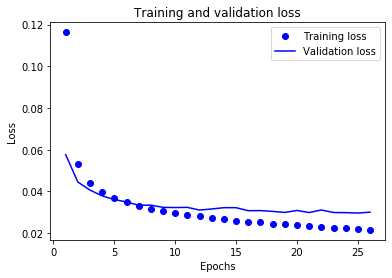

In [ ]:
acc = historia.history['acc']
val_acc = historia.history['val_acc']
loss = historia.history['loss']
val_loss = historia.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = modelo.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 63us/step
test_acc: 0.9905500003814697
